![title](UCN_ICI.PNG)

#  <font color= #007FFF> Optimización Multi Objetivo </font>

<div class="alert alert-info"> </h4> Material preparado para la carrera de Ingeniería Civil Industrial | Universidad Católica del Norte | Escuela de Ingeniería - Campus Coquimbo | Curso Electivo: Optimización Multi Objetivo</h4> </div>

En un problema de optimización se tratará de encontrar una solución que represente el valor óptimo para una función objetivo. En el caso tradicional se tendrá un único objetivo y el valor óptimo corresponderá a un mínimo o a un máximo.

Pero en ciencias e ingeniería se dan, en bastantes ocasiones, problemas que requieren la optimización simultánea de más de un objetivo ([optimización multiobjetivo](https://en.wikipedia.org/wiki/Multi-objective_optimization), pero el problema está en que normalmente no existe un elemento de S que produzca un óptimo de forma simultánea para cada uno de los k objetivos que componen las funciones.Esto se deberá a la existencia de conflictos entre objetivos, que harán que la mejora de uno de ellos dé lugar a un empeoramiento de algún otro. Pensemos por ejemplo en el caso de un avión con dos objetivos que fueran su velocidad y el ahorro de combustible: un aumento de la velocidad traería consigo una disminución del ahorro. Habrá que llegar por tanto a una situación de compromiso en la que todos los objetivos sean satisfechos en un grado aceptable, desde el punto de vista de diseño.

A diferencia de los problemas de optimización con un único objetivo, el concepto de óptimo es ahora relativo y será necesario decidir de alguna forma cuál es la mejor solución (o cuáles son las mejores soluciones) al problema.


Para tratar el problema comentado del conflicto entre objetivos se han utilizado diversos métodos:

 - Métodos basados en el concepto de [eficiencia de Pareto](https://es.wikipedia.org/wiki/Eficiencia_de_Pareto)
 - Métodos basados en la combinación de objetivos. 

> El objetivo de este material es introducir a la optimización multi objetivo utilizando Python y Cplex | Python y Gurobi.
Para mayor información puede visitar el siguiente link [Cplex IBM](https://ibmdecisionoptimization.github.io/tutorials/html/Linear_Programming.html)
o [GUROBI](https://www.gurobi.com/es/resource/python-i-webinar/)


##  <font color= #007FFF> e-Constraint Method </font>

En el método de restricción ε, una de las funciones objetivo se selecciona para ser optimizado, los otros se convierten en restricciones y el problema obtiene formar:

\begin{equation}
Min\;f_i(x)
\\
s.t \; \; f_j(x)\leq \epsilon_j
\end{equation}

En lo que respecta a la optimización, la solución del problema puede ser demostrado que siempre es óptimo de Pareto débil. Por otro lado, x ∈ S puede ser demostrado ser Pareto óptimo si y solo si resuelve el problem anterior. Además, una solución única se puede demostrar que es Pareto óptimo para cualquier límite superior. En otra
palabras, para garantizar la optimización de Pareto debemos resolver k diferentes problemas (y resolver muchos problemas para cada solución óptima de Pareto aumenta el costo de computación) u obtener una solución única (que no es necesariamente fácil de verificar). Sin embargo, un hecho positivo es que encontrar cualquier solución óptima de Pareto no necesita convexidad. En otras palabras, este método funciona tanto para problemas convexos como no convexos.


### <font color=#007FFF> Modelo de Programación Lineal - Multi Objetivo | Ejemplo: </font>
\begin{equation}
Max\;f_1=2x+3y
\\
Min\;f_2=x+2
\\
s.t
\\
x+y \leq 15 
\\
y -2x \leq 0 
\\
x \geq 5 
\\
y \geq 3
\\
x,y \geq 0
\end{equation}

<img src="Cplex_logo.png" width="150" height="150" />

<div class="alert alert-block alert-warning">

<b> **Cplex:**</b> 
Solucioando el problema con cada función objetivo por separado y gráficandolas. 
</div>


In [2]:
# Importanto Cplex
from docplex.mp.model import Model

# Inicializando el modelo
mdl = Model('modelo-max')

# Creando las variables de decisión - continuas

x = mdl.continuous_var(name='x')
y = mdl.continuous_var(name='y')

In [3]:
# Escribiendo las restricciones 
# Utilizando la función objetivo de maximización

mdl.maximize(2*x+3*y)

mdl.add_constraint(x+y <= 15)
mdl.add_constraint(y-2*x <= 0)
mdl.add_constraint(x >= 5)
mdl.add_constraint(y >=3)

print(mdl.export_to_string())

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: modelo-max

Maximize
 obj: 2 x + 3 y
Subject To
 c1: x + y <= 15
 c2: - 2 x + y <= 0
 c3: x >= 5
 c4: y >= 3

Bounds
End



In [4]:
solucion = mdl.solve(log_output=True)
solucion.display()

CPXPARAM_Read_DataCheck                          1
Tried aggregator 1 time.
LP Presolve eliminated 3 rows and 1 columns.
Aggregator did 1 substitutions.
All rows and columns eliminated.
Presolve time = 0.01 sec. (0.00 ticks)
solution for: modelo-max
objective: 40.000
x = 5.000
y = 10.000


In [5]:
mdl = Model('modelo-min')
x = mdl.continuous_var(name='x')
y = mdl.continuous_var(name='y')

In [6]:
# Escribiendo las restricciones
# Utilizando la función objetivo de minimización

mdl.minimize(x+2*y)
mdl.add_constraint(x+y <= 15)
mdl.add_constraint(y-2*x <= 0)
mdl.add_constraint(x >= 5)
mdl.add_constraint(y >=3)

print(mdl.export_to_string())

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: modelo-min

Minimize
 obj: x + 2 y
Subject To
 c1: x + y <= 15
 c2: - 2 x + y <= 0
 c3: x >= 5
 c4: y >= 3

Bounds
End



In [7]:
solucion = mdl.solve(log_output=True)
solucion.display()

CPXPARAM_Read_DataCheck                          1
Tried aggregator 1 time.
LP Presolve eliminated 4 rows and 2 columns.
All rows and columns eliminated.
Presolve time = 0.01 sec. (0.00 ticks)
solution for: modelo-min
objective: 11.000
x = 5.000
y = 3.000


### Resuminedo los pasos realizados:
<div class="alert alert-info">

<b> **Problemas por separado:**</b> 
Primero se resolvio el problema de máximización, encontrando lo que es la cota superior del problema ( Upper Bound). Luego se resolvio el problema de minimización encontrando lo que es la cota inferior del problema ( Lower Bound).El resumen de los resultados esta disponible en la tabla a continuación
</div>

| Función Objetivo | Valor | $x$  | $y$ |
|:----------------:|:-----:|:----:|-----|
|  Maximización    |   40  |  5   | 11  |
|  Minimización    |   11  |  5   |  3  |


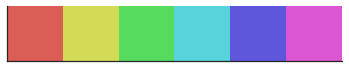

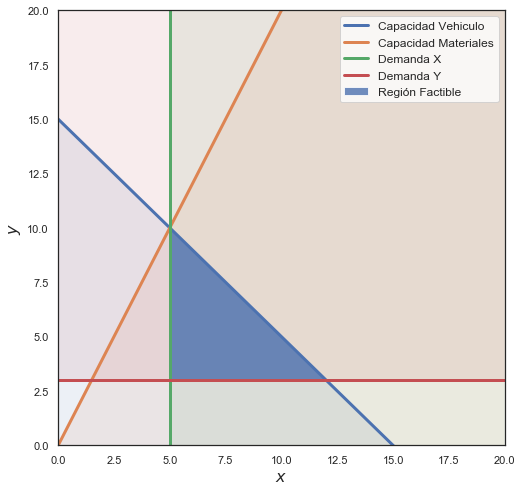

In [8]:
# graficar 
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch
import seaborn as sns

colores=sns.palplot(sns.color_palette("hls", ))
sns.set()
sns.set(style='white')
sns.despine()
sns.set_context('notebook')

# Crear un objeto gráfico.
fig, ax = plt.subplots(figsize=(8, 8))
x = np.linspace(0, 20)
y = np.linspace(0, 20)

# agregando la restricción de horas de capintería
plt.plot(x, 15 - x, lw=3, label='Capacidad')
plt.fill_between(x, 0, 15 - x, alpha=0.1)

# agregando la restricción de horas de acabado
plt.plot(x,2*x, lw=3, label='Materiales')
plt.fill_between(x,2*x,0,alpha=0.1)

# agregando la restricción de demanda
plt.plot(5 * np.ones_like(x), x, lw=3, label='Demanda X')
plt.fill_betweenx(x, 5, 20, alpha=0.1)

# agregando la restricción de demanda
plt.plot(y, 3 * np.ones_like(y), lw=3, label='Demanda Y')
plt.fill_betweenx(y+3,  0, 20, alpha=0.1)


# Sobrear la región Factible.
path = Path([
    (5, 3),
    (5, 10),
    (12, 3)])
patch = PathPatch(path, label='Región Factible', alpha=0.8)
ax.add_patch(patch)

plt.xlabel('$x$', fontsize=16)
plt.ylabel('$y$', fontsize=16)
plt.xlim(0, 20)
plt.ylim(0, 20)
plt.legend(fontsize=12)
plt.show()

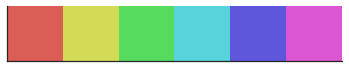

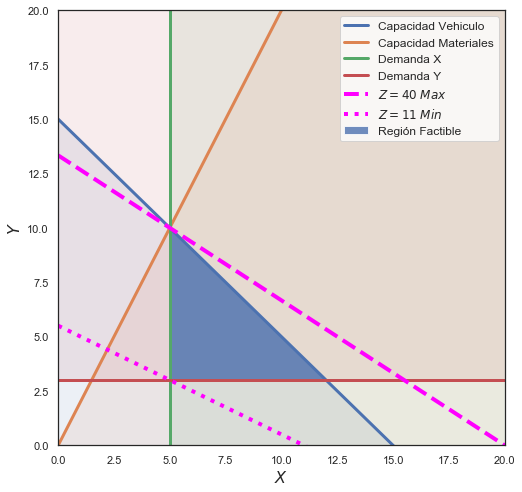

In [8]:
# Aprendiendo a graficar 
colores=sns.palplot(sns.color_palette("hls", ))
sns.set()
sns.set(style='white')
sns.despine()
sns.set_context('notebook')

# Crear un objeto gráfico.
fig, ax = plt.subplots(figsize=(8, 8))
x = np.linspace(0, 20)
y = np.linspace(0, 20)

# agregando la restricción de horas de capintería
plt.plot(x, 15 - x, lw=3, label='Capacidad')
plt.fill_between(x, 0, 15 - x, alpha=0.1)

# agregando la restricción de horas de acabado
plt.plot(x,2*x, lw=3, label='Materiales')
plt.fill_between(x,2*x,0,alpha=0.1)

# agregando la restricción de demanda
plt.plot(5 * np.ones_like(x), x, lw=3, label='Demanda X')
plt.fill_betweenx(x, 5, 20, alpha=0.1)

# agregando la restricción de demanda
plt.plot(y, 3 * np.ones_like(y), lw=3, label='Demanda Y')
plt.fill_betweenx(y+3,  0, 20, alpha=0.1)


# Sobrear la región Factible.
path = Path([
    (5, 3),
    (5, 10),
    (12, 3)])
patch = PathPatch(path, label='Región Factible', alpha=0.8)
ax.add_patch(patch)


# agregando las funciones objetivo
plt.plot(x,(40/3) -(2/3) * x,color='magenta',linestyle='dashed',lw=4, label='$Z=40 \; Max$')
plt.plot(x, (11/2) -(1/2) * x,color='magenta',linestyle='dotted',lw=4, label='$Z=11 \; Min$')

plt.xlabel('$X$', fontsize=16)
plt.ylabel('$Y$', fontsize=16)
plt.xlim(0, 20)
plt.ylim(0, 20)
plt.legend(fontsize=12)

plt.show()

#  <font color= #007FFF> Metodo de E-constraint utilizando **Cplex** </font>

<div class="alert alert-block alert-warning">

<b> **Cplex:**</b> 
Generación de frontera de pareto aplicando método de E-constraint.Una de las funciones objetivos se convierte en una restricción con la condición de que debe ser menor a la variable $\varepsilon_i$. 
</div>

#### Model 1
$ Max \; f_1=2x+3y$

s.t

$x+y \leq 15$

$ y -2x \leq 0$

$x \geq 5$

$y \geq 3$

$x + 2y \leq \varepsilon_1$

In [9]:
# Upper Bound

mdl = Model('MDCM_1')
x = mdl.continuous_var(name='x')
y = mdl.continuous_var(name='y')
e1 = mdl.continuous_var(name='e1')

# MDCM_1 - Upper Bound
mdl.maximize(2*x +3*y)
mdl.add_constraint(x+y <= 15)
mdl.add_constraint(y-2*x <= 0)
mdl.add_constraint(x >= 5)
mdl.add_constraint(y >= 3)
mdl.add_constraint(x+2*y <=e1)

solucion = mdl.solve(log_output=True)
print("*****************")
print("Solución modelo 1")
solucion.display()

CPXPARAM_Read_DataCheck                          1
Tried aggregator 1 time.
LP Presolve eliminated 4 rows and 2 columns.
Aggregator did 1 substitutions.
All rows and columns eliminated.
Presolve time = 0.01 sec. (0.00 ticks)
*****************
Solución modelo 1
solution for: MDCM_1
objective: 40.000
x = 5.000
y = 10.000
e1 = 25.000


In [10]:
modelo = Model('MDCM_2')
x = modelo.continuous_var(name='x')
y = modelo.continuous_var(name='y')
e2 = modelo.continuous_var(name='e2')

modelo.minimize(x +2*y)
modelo.add_constraint(x+y <= 15)
modelo.add_constraint(y-2*x <= 0)
modelo.add_constraint(x >= 5)
modelo.add_constraint(y >= 3)
modelo.add_constraint(x +3*y <=e2)

solucion_2 = modelo.solve(log_output=True)
print("*****************")
print("Solución modelo 2")
solucion_2.display()

CPXPARAM_Read_DataCheck                          1
Tried aggregator 1 time.
LP Presolve eliminated 5 rows and 3 columns.
All rows and columns eliminated.
Presolve time = 0.01 sec. (0.00 ticks)
*****************
Solución modelo 2
solution for: MDCM_2
objective: 11.000
x = 5.000
y = 3.000
e2 = 14.000


###  <font color= #007FFF> Resuminedo los pasos realizados </font>

<div class="alert alert-info">
<b> **Problemas por separado:**</b> 
Luego de resolver los dos problemas con la restricción obtenemos:</div>

- Maximizando el problema se tiene su valor máximo y $\varepsilon_i$ el valor máximo de la función de minimización, lo que será la cota superior de está (Upper Bound).

- Minimizanzo el problema se tiene su valor mínimo y $\varepsilon_i$el valor mínimo de la función de maximización, lo que será la cota inferior de está ( Lower Bound).


| Función Objetivo | $Z$   | $\varepsilon_i$ | $Z_i$| $x$ |$y$ |
|:----------------:|:-----:|:---------------:|------|-----|----|
|  Maximización    |   40  |  25             | 25   |5    |11  |
|  Minimización    |   11  |  14             | 19   |5    |3   |

###  <font color= #007FFF> Lower and Upper Bound </font>


| Función Objetivo | Cota Superior| Cota Inferior | 
|:----------------:|:------------:|:-------------:|
|  $Z_1$           |   40         |  19           | 
|  $Z_2$           |   25         |  11           |

###  <font color= #007FFF> Generando la Frontera Pareto Eficiente </font>

<div class="alert alert-block alert-warning">

<b> **Pareto Frontier:**</b> 
Una vez que se conocen las cotas superiores e inferiores de las dos funciones objetivo, seleccionaremos una de estas funciones para utilizarlas en la Restricción. Posteriormente de eso resolveremos el problema para todos o la mayoría de los valores entre la cota superior e inferior. </div>




In [11]:
# e comienza en 25 y temrina en 11.
list_x=[]
list_y=[]
f1=[]
f2=[]


for e in range(25,10,-1):
    model = Model('MDCM')
    x = model.continuous_var(name='x')
    y = model.continuous_var(name='y')
    
    model.maximize(2*x +3*y)
    model.add_constraint(x+y <= 15)
    model.add_constraint(y-2*x <= 0)
    model.add_constraint(x >= 5)
    model.add_constraint(y >= 3)
    model.add_constraint(x+2*y <=e)
    
    solution=model.solve(log_output=False)
    
    list_x.append(solution.get_value(x))
    list_y.append(solution.get_value(y))
    
    f1.append(solution.get_objective_value())
    f2.append(e)

In [12]:
print(f1)

[40.0, 39.0, 38.0, 37.0, 36.0, 35.0, 34.0, 33.0, 31.0, 29.0, 27.0, 25.0, 23.0, 21.0, 19.0]


In [13]:
print(f2)

[25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11]


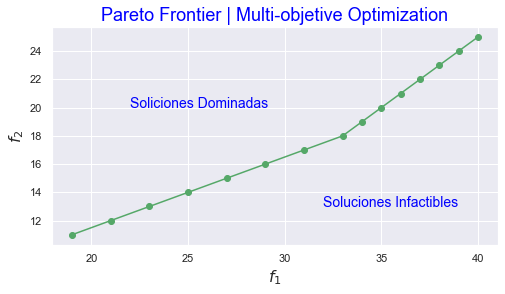

In [14]:
plt.figure(figsize=(8,4))

sns.set(style="darkgrid")
plt.plot(f1,f2,'o-',color='g')

plt.xlabel('$f_1$', fontsize=16)
plt.ylabel('$f_2$', fontsize=16)
plt.title("Pareto Frontier | Multi-objetive Optimization",fontsize=18,color='blue')

plt.text(22, 20, "Soliciones Dominadas", fontsize=14,color='blue')
plt.text(32, 13, "Soluciones Infactibles", fontsize=14,color='blue')

plt.show()

In [15]:
import pandas as pd
df=pd.DataFrame(list(zip(f1, f2, list_x,list_y)),columns=['$f_1$','$f_2$', 'x','y'])
df

,$f_1$,$f_2$,x,y
0,40.0,25,5.0,10.0
1,39.0,24,6.0,9.0
2,38.0,23,7.0,8.0
3,37.0,22,8.0,7.0
4,36.0,21,9.0,6.0
5,35.0,20,10.0,5.0
6,34.0,19,11.0,4.0
7,33.0,18,12.0,3.0
8,31.0,17,11.0,3.0
9,29.0,16,10.0,3.0


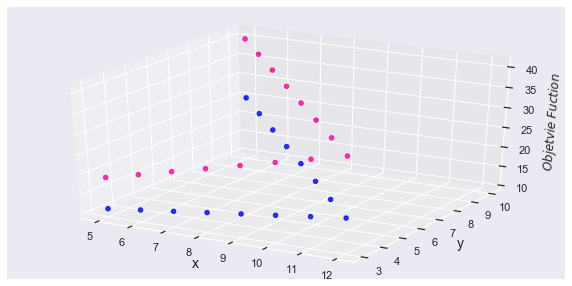

In [16]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,5))
#plt.subplot(1,2,1)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['x'],df['y'],df['$f_1$'],c='#ff0097', marker='o', alpha=0.8)
ax.scatter(df['x'],df['y'],df['$f_2$'],c='blue', marker='o', alpha=0.8)
    
ax.set_xlabel('x',fontsize='14')
ax.set_ylabel('y',fontsize='14')
ax.set_zlabel('$Objetvie \; Fuction$')
plt.show()

<img src="logo_gurobi.png" width="400" height="400" />

### <font color=#007FFF> Modelo de Programación Lineal  | Ejemplo: </font>
\begin{equation}
Max\;f_1=2x+3y
\\
Max\;f_2=x+2y
\\
s.t
\\
x+y \leq 15 
\\
y -2x \leq 0 
\\
x \geq 5 
\\
y \geq 3
\end{equation}


<div class="alert alert-block alert-warning">

<b> **Gurobi:**</b> 
Ahora utilizaremos Gurobi para resolver el mismo problema.
Primero resolveremos el problema para una sola función objetivo y luego resolveremos el problema de la $\epsilon$ constraint </div>

In [17]:
from gurobipy import *
model = Model('ejemplo_1 - Gurobi')

Academic license - for non-commercial use only


In [18]:
x = model.addVar(vtype=GRB.CONTINUOUS, name='x')
y = model.addVar(vtype=GRB.CONTINUOUS, name='y')

In [19]:
model.setObjective(2*x+3*y, GRB.MAXIMIZE)
model.addConstr(x+y<=15,"c1")
model.addConstr(-2*x+y<=0,"c2")
model.addConstr(x>=5,"c3")
model.addConstr(y>=3,"c4")

model.optimize()

Optimize a model with 4 rows, 2 columns and 6 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 2e+00]
  Objective range  [2e+00, 3e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e+00, 2e+01]
Presolve removed 4 rows and 2 columns
Presolve time: 0.02s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    4.0000000e+01   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.03 seconds
Optimal objective  4.000000000e+01


In [20]:
if model.Status==GRB.Status.OPTIMAL:
    print("Solución Optima")
else:
    print("No óptimo")

Solución Optima


In [21]:
model.getVars()

[<gurobi.Var x (value 5.0)>, <gurobi.Var y (value 10.0)>]

In [22]:
sol_var = [x.x,y.x]
sol_var

[5.0, 10.0]

In [23]:
model.ObjVal

40.0

### <font color=#007FFF> Aplicando $\epsilon$-constraint con Gurobi: </font>

In [24]:
# Primero resolver el problema de maximización:
model_1 = Model('ejemplo_1 - Gurobi')

x = model_1.addVar(vtype=GRB.CONTINUOUS, name='x')
y = model_1.addVar(vtype=GRB.CONTINUOUS, name='y')
e_1 = model_1.addVar(vtype=GRB.CONTINUOUS, name='e_1')

model_1.setObjective(2*x+3*y, GRB.MAXIMIZE)
model_1.addConstr(x+y<=15,"c1")
model_1.addConstr(-2*x+y<=0,"c2")
model_1.addConstr(x>=5,"c3")
model_1.addConstr(y>=3,"c4")
model_1.addConstr(x+2*y<=e_1,"ce")

model_1.optimize()
print("Función Objetivo ",model_1.ObjVal)

Optimize a model with 5 rows, 3 columns and 9 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 2e+00]
  Objective range  [2e+00, 3e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e+00, 2e+01]
Presolve removed 5 rows and 3 columns
Presolve time: 0.02s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    4.0000000e+01   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.03 seconds
Optimal objective  4.000000000e+01
Función Objetivo  40.0


In [25]:
sol_var_1 = [x.x,y.x,e_1.x]
sol_var_1

[5.0, 10.0, 25.0]

In [26]:
# Primero resolver el problema de maximización:
model_2 = Model('ejemplo_1 - Gurobi')

x = model_2.addVar(vtype=GRB.CONTINUOUS, name='x')
y = model_2.addVar(vtype=GRB.CONTINUOUS, name='y')
e_2 = model_2.addVar(vtype=GRB.CONTINUOUS, name='e_2')

model_2.setObjective(x+2*y, GRB.MINIMIZE)
model_2.addConstr(x+y<=15,"c1")
model_2.addConstr(-2*x+y<=0,"c2")
model_2.addConstr(x>=5,"c3")
model_2.addConstr(y>=3,"c4")
model_2.addConstr(2*x+3*y<=e_2,"ce")

model_2.optimize()
print("Función Objetivo ",model_2.ObjVal)

Optimize a model with 5 rows, 3 columns and 9 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 3e+00]
  Objective range  [1e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e+00, 2e+01]
Presolve removed 5 rows and 3 columns
Presolve time: 0.02s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.1000000e+01   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.03 seconds
Optimal objective  1.100000000e+01
Función Objetivo  11.0


In [27]:
sol_var_2 = [x.x,y.x,e_2.x]
sol_var_2

[5.0, 3.0, 19.0]

In [28]:
# e comienza en 25 y temrina en 11.
list_x=[]
list_y=[]
f1=[]
f2=[]


for e in range(25,10,-1):
    model_e = Model('Pareto Frontier - Gurobi')
    model_e.setParam('OutputFlag', 0)

    x = model_e.addVar(vtype=GRB.CONTINUOUS, name='x')
    y = model_e.addVar(vtype=GRB.CONTINUOUS, name='y')
    
    model_e.setObjective(2*x+3*y, GRB.MAXIMIZE)
    model_e.addConstr(x+y<=15,"c1")
    model_e.addConstr(-2*x+y<=0,"c2")
    model_e.addConstr(x>=5,"c3")
    model_e.addConstr(y>=3,"c4")
    model_e.addConstr(x+2*y<=e,"ce")

    model_e.optimize()
    
    list_x.append(x.x)
    list_y.append(y.x)
    
    f1.append(model_e.ObjVal)
    f2.append(e)

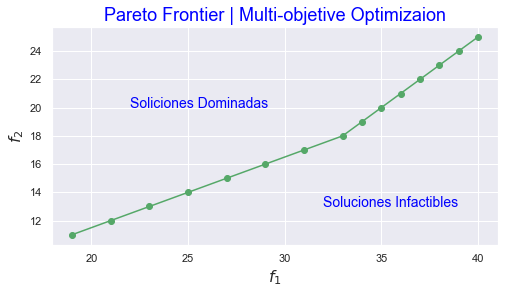

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))

sns.set(style="darkgrid")
plt.plot(f1,f2,'o-',color='g')

plt.xlabel('$f_1$', fontsize=16)
plt.ylabel('$f_2$', fontsize=16)
plt.title("Pareto Frontier | Multi-objetive Optimizaion",fontsize=18,color='blue')

plt.text(22, 20, "Soliciones Dominadas", fontsize=14,color='blue')
plt.text(32, 13, "Soluciones Infactibles", fontsize=14,color='blue')

plt.show()

In [30]:
import pandas as pd
df=pd.DataFrame(list(zip(f1, f2, list_x,list_y)),columns=['$f_1$','$f_2$', 'x','y'])
df

,$f_1$,$f_2$,x,y
0,40.0,25,5.0,10.0
1,39.0,24,6.0,9.0
2,38.0,23,7.0,8.0
3,37.0,22,8.0,7.0
4,36.0,21,9.0,6.0
5,35.0,20,10.0,5.0
6,34.0,19,11.0,4.0
7,33.0,18,12.0,3.0
8,31.0,17,11.0,3.0
9,29.0,16,10.0,3.0


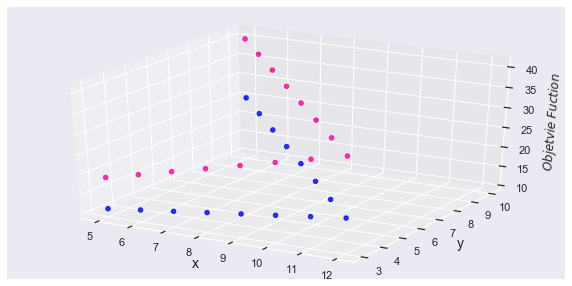

In [31]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,5))
#plt.subplot(1,2,1)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['x'],df['y'],df['$f_1$'],c='#ff0097', marker='o', alpha=0.8)
ax.scatter(df['x'],df['y'],df['$f_2$'],c='blue', marker='o', alpha=0.8)
    
ax.set_xlabel('x',fontsize='14')
ax.set_ylabel('y',fontsize='14')
ax.set_zlabel('$Objetvie \; Fuction$')
plt.show()